In [ ]:
# PCA()

In [ ]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
matdat = loadmat('/content/gdrive/MyDrive/ALMdata.mat')

Nopr = matdat['PSTH_nonprefer_cue_aligned']
Pref = matdat['PSTH_prefer_cue_aligned']
t = matdat['t'][0]
chanidx = matdat['Channel_all']

print(Nopr.shape), print(' ')
print(Pref.shape), print(' ')
print(t.shape), print(' ')

chanidx = chanidx.flatten()
print(chanidx.shape)

(1186, 5101)
 
(1186, 5101)
 
(5101,)
 
(1186,)


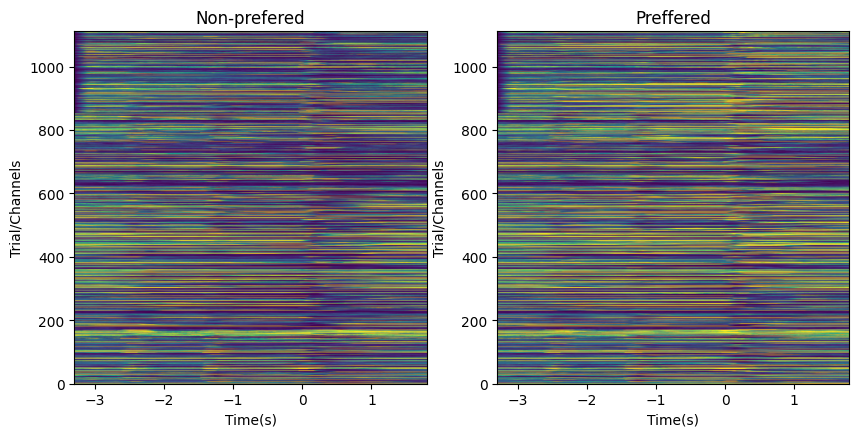

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,6))

ax[0].imshow(Nopr,extent=[t[0],t[-1],0,Nopr.shape[0]],
             vmin=0,vmax=10,origin='upper')
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel('Time(s)')
ax[0].set_ylabel('Trial/Channels')
ax[0].set_title('Non-prefered')

ax[1].imshow(Pref,extent=[t[0],t[-1],0,Pref.shape[0]],origin='upper',
             vmin=0,vmax=10)
ax[1].set_aspect(1/ax[0].get_data_ratio())
ax[1].set_xlabel('Time(s)')
ax[1].set_ylabel('Trial/Channels')
ax[1].set_title('Preffered')
plt.show()

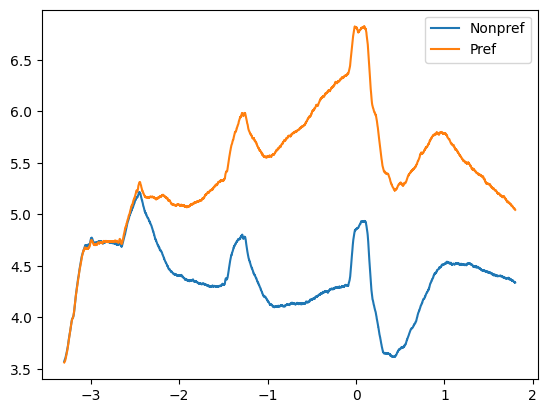

In [ ]:
plt.plot(t,np.mean(Nopr,axis=0),label='Nonpref')
plt.plot(t,np.mean(Pref,axis=0),label='Pref')

plt.legend()
plt.show()

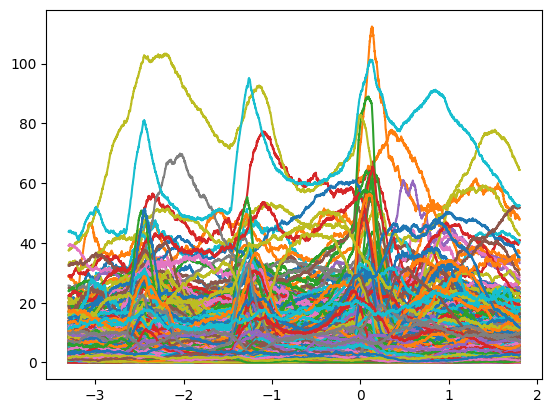

array([0.        , 0.        , 0.        , ..., 0.11111111, 0.11111111,
       0.11111111])

In [ ]:
plt.plot(t,Nopr.T)

plt.show()
Nopr[380,:]

In [ ]:
print(Nopr.shape)
Nopr = Nopr[np.isfinite(Nopr[:,0]),:]
print(Nopr.shape)

chanidx = chanidx[np.isfinite(Pref[:,0])]

Pref = Pref[np.isfinite(Pref[:,0]),:]

(1186, 5101)
(1111, 5101)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64], dtype=uint8)

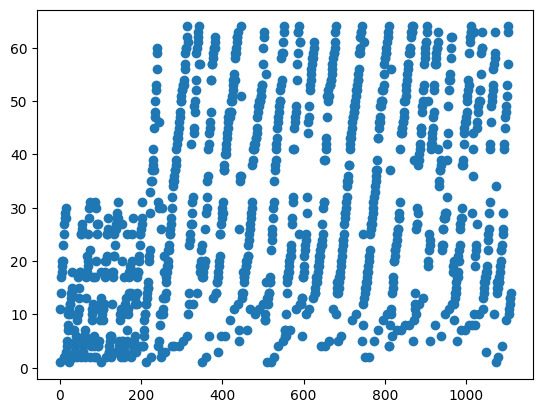

In [ ]:
plt.plot(chanidx,'o')
np.unique(chanidx)

In [ ]:
# compute new data matrices

nchans = np.max(chanidx)

chanaveNopr = np.zeros((nchans,len(t)))
chanavePref = np.zeros((nchans,len(t)))

for i in range(1,nchans+1):
  chanaveNopr[i-1,:] = np.mean( Nopr[chanidx==i,:],axis = 0 )
  chanavePref[i-1,:] = np.mean( Pref[chanidx==i,:],axis = 0 )

print(chanaveNopr.shape)

(64, 5101)


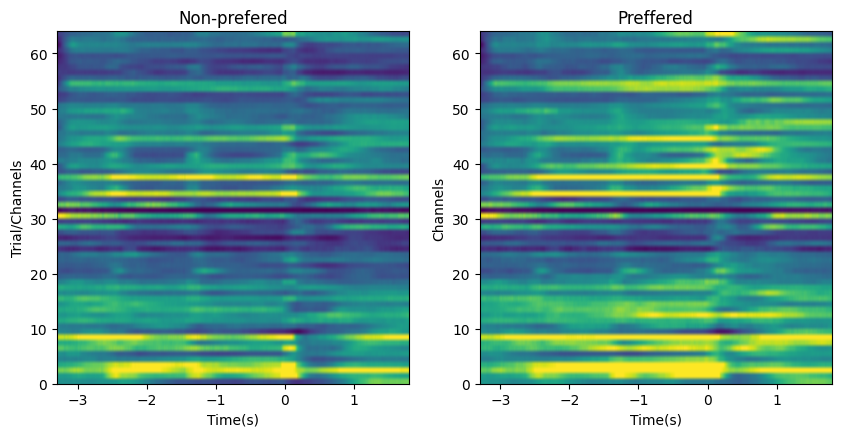

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,6))

ax[0].imshow(chanaveNopr,extent=[t[0],t[-1],0,nchans],
             vmin=0,vmax=10,origin='upper')
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel('Time(s)')
ax[0].set_ylabel('Trial/Channels')
ax[0].set_title('Non-prefered')

ax[1].imshow(chanavePref,extent=[t[0],t[-1],0,nchans],origin='upper',
             vmin=0,vmax=10)
ax[1].set_aspect(1/ax[0].get_data_ratio())
ax[1].set_xlabel('Time(s)')
ax[1].set_ylabel('Channels')
ax[1].set_title('Preffered')
plt.show()

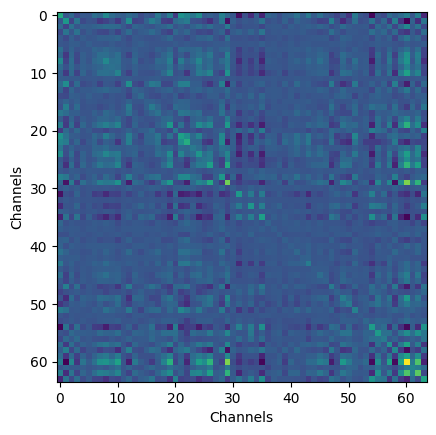

In [ ]:
# compute covariance matrices

covmatPref = np.cov(chanavePref)
covmatNopr = np.cov(chanaveNopr)

covmat = (covmatNopr + covmatPref) / 2

plt.imshow(covmat)
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.show()

# 1) mean-center the data
# 2) compute A@A.T
# 3) normalise by n-1

<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-41306767.py:10: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\lambda$')


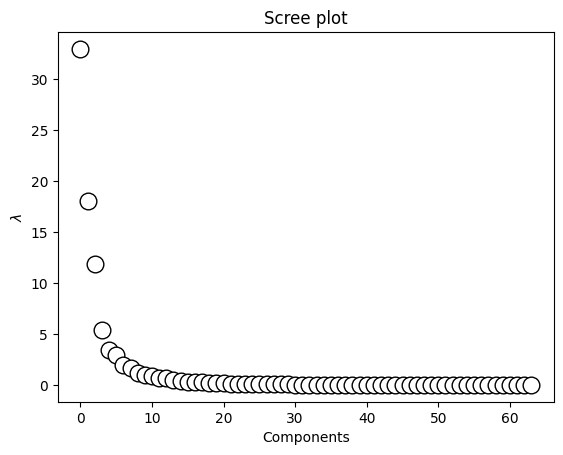

In [ ]:
evals,evecs = np.linalg.eigh(covmat)

sidx = np.argsort(evals)[::-1]

evals = evals[sidx]
evecs = evecs[:,sidx]

plt.plot(evals,'ko',markerfacecolor='w',markersize=12)
plt.xlabel('Components')
plt.ylabel('$\lambda$')
plt.title('Scree plot')

plt.show()

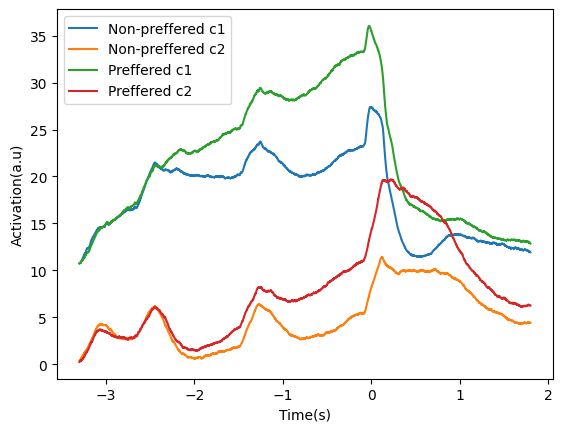

In [ ]:
for i in range(2):
  # find the largest component magnitude
  maxi = np.argmax(abs(evecs[:,i]))
  evecs[:,i] *= np.sign(evecs[maxi,i])

# compute the PC time series
pcNopr = evecs[:,0:2].T @ chanaveNopr
pcPref = evecs[:,0:2].T @ chanavePref

plt.plot(t,pcNopr.T,t,pcPref.T)
plt.legend(['Non-preffered c1','Non-preffered c2','Preffered c1','Preffered c2'])
plt.xlabel('Time(s)')
plt.ylabel('Activation(a.u)')
plt.show()

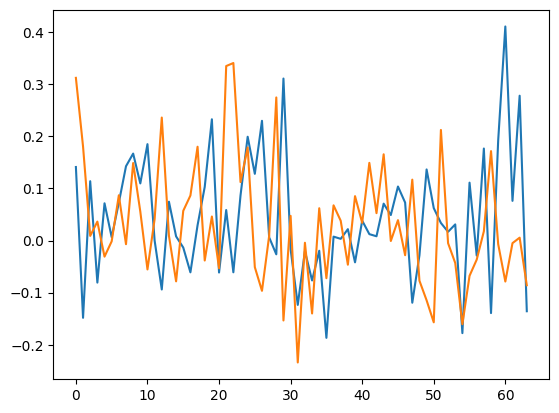

In [ ]:
plt.plot(evecs[:,0:2])
plt.show()

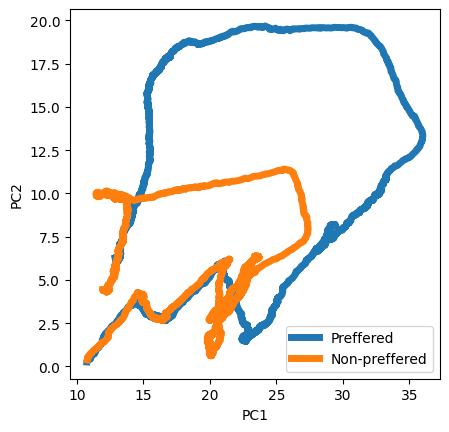

In [ ]:
plt.plot(pcPref[0,:],pcPref[1,:],linewidth = 5,label = 'Preffered')
plt.plot(pcNopr[0,:],pcNopr[1,:],linewidth = 5,label = 'Non-preffered')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.show()

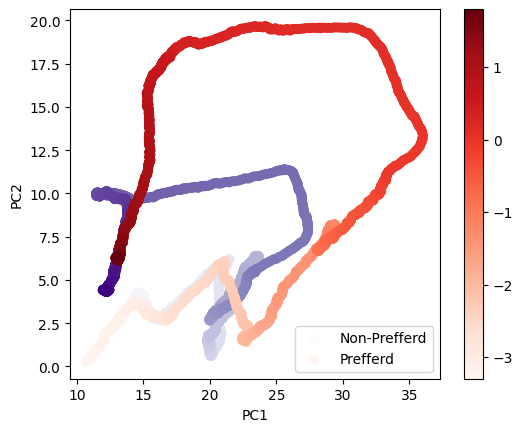

In [ ]:
plt.scatter(pcNopr[0,:],pcNopr[1,:],cmap = 'Purples',c=t,label = 'Non-Prefferd')
plt.scatter(pcPref[0,:],pcPref[1,:],cmap = 'Reds',c=t, label = 'Prefferd')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.legend()
plt.show()